# 10% PERCENT

In [1]:
#  import libraries
!pip install yfinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import yfinance as yf
warnings.filterwarnings("ignore")

     |████████████████████████████████| 6.4 MB 5.9 MB/s 
     |████████████████████████████████| 63 kB 531 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
# Russell 3000 index

r_index = pd.read_csv("https://raw.githubusercontent.com/sukritik/DataRussell3000/main/RUA.csv").fillna(method='ffill')
print(r_index)

            Date         Open         High  ...        Close    Adj Close  Volume
0     1987-09-10   178.960007   178.960007  ...   178.830002   178.830002     0.0
1     1987-09-11   178.830002   181.470001  ...   181.339996   181.339996     0.0
2     1987-09-14   181.339996   182.250000  ...   181.789993   181.789993     0.0
3     1987-09-15   181.789993   181.789993  ...   179.270004   179.270004     0.0
4     1987-09-16   179.270004   180.630005  ...   177.889999   177.889999     0.0
...          ...          ...          ...  ...          ...          ...     ...
8662  2022-01-24  2551.000000  2569.959961  ...  2565.949951  2565.949951     0.0
8663  2022-01-25  2563.280029  2563.889893  ...  2531.379883  2531.379883     0.0
8664  2022-01-26  2535.689941  2587.969971  ...  2523.629883  2523.629883     0.0
8665  2022-01-27  2524.239990  2568.310059  ...  2505.659912  2505.659912     0.0
8666  2022-01-28  2505.919922  2567.169922  ...  2566.790039  2566.790039     0.0

[8667 rows x 7 

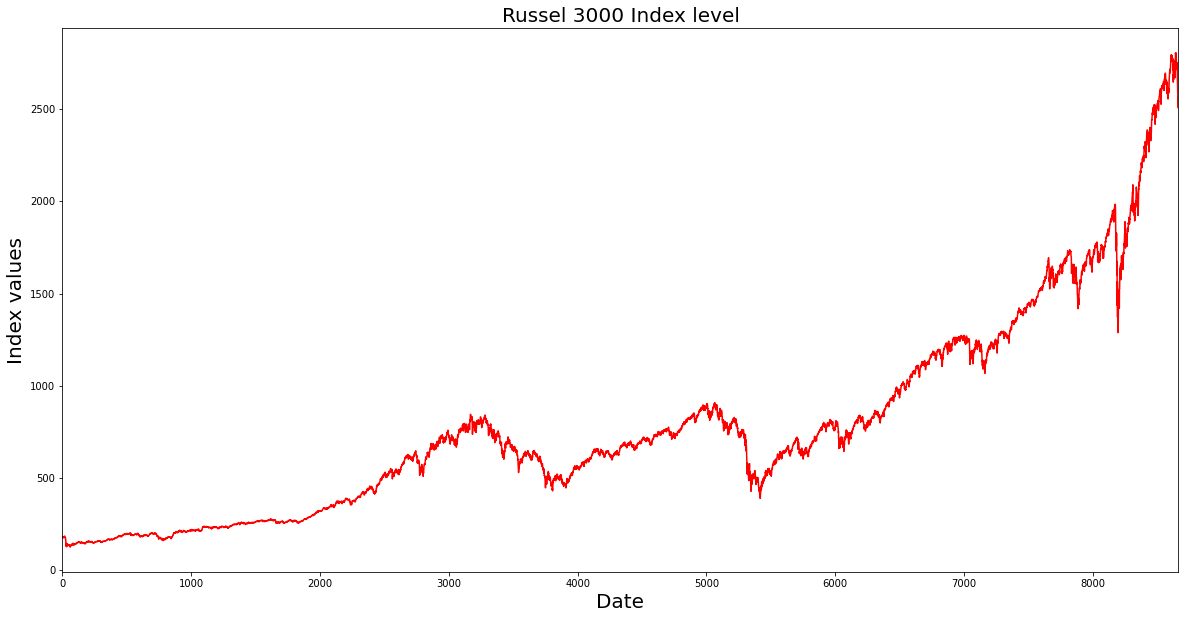

In [3]:
plt.figure(figsize=(20,10))
plt.plot(r_index['Adj Close'],color='r')
plt.title('Russel 3000 Index level',fontsize=20)
plt.ylabel('Index values',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.margins(x=0)
plt.show()

In [4]:
r_index.set_index('Date', inplace=True)

1. Bear run <- if from the previous cut off point we go -20% or below
2. Bull run <- if from the previous cut off point we go 20% or above
3. If the market does not reach the 20% threshold value for over 6 months or 1 year 
4. If during the bull regime, the market in the previous months are always increasing then we define it as extremely bullish otherwise count the number of days and define fairly bullish if the number of days of increase is more than 50%
5. If during the bear regime, the market in the previous months are always decreasing then we define it as extremely bearish otherwise count the number of days and define fairly bearish if the number of days of decrease is more than 50%

In [5]:
ref_index = r_index.index.values.tolist()[0]
ref_start_val = r_index['Adj Close'][0]
count_days = 0
count=[]

dates = []
trends = []
dates.append(ref_index)

for index, row in r_index.iterrows():
    
    count_days += 1

    if row['Adj Close'] >= 1.10 * ref_start_val:
      dates.append(index)
      trends.append('BULL')
      count.append(count_days)
      count_days = 0
      ref_index = index
      ref_start_val = row['Adj Close']

    elif row['Adj Close'] <= 0.90 * ref_start_val and count_days >= 22:
      dates.append(index)
      trends.append('BEAR')
      count.append(count_days)
      count_days = 0
      count_days = 0
      ref_index = index
      ref_start_val = row['Adj Close']

    
    if count_days >= 252:
      dates.append(index)
      trends.append('NEUTRAL')
      count.append(count_days)
      count_days = 0
      ref_index = index
      ref_start_val = row['Adj Close']
    

In [6]:
for i, trend in enumerate(trends):
  print(str(dates[i]) + ' to ' + str(dates[i+1]) + ' -> ' + str(trend) + ' Number of days since last change ->', str(count[i]))

1987-09-10 to 1987-10-16 -> BEAR Number of days since last change -> 27
1987-10-16 to 1987-11-17 -> BEAR Number of days since last change -> 22
1987-11-17 to 1988-02-22 -> BULL Number of days since last change -> 65
1988-02-22 to 1989-01-26 -> BULL Number of days since last change -> 236
1989-01-26 to 1989-05-19 -> BULL Number of days since last change -> 79
1989-05-19 to 1989-10-04 -> BULL Number of days since last change -> 95
1989-10-04 to 1990-01-29 -> BEAR Number of days since last change -> 80
1990-01-29 to 1990-05-29 -> BULL Number of days since last change -> 83
1990-05-29 to 1990-08-21 -> BEAR Number of days since last change -> 59
1990-08-21 to 1991-02-05 -> BULL Number of days since last change -> 116
1991-02-05 to 1991-04-16 -> BULL Number of days since last change -> 48
1991-04-16 to 1992-01-14 -> BULL Number of days since last change -> 189
1992-01-14 to 1993-01-12 -> NEUTRAL Number of days since last change -> 252
1993-01-12 to 1993-10-15 -> BULL Number of days since las

In [7]:
print('Number of Bull runs = ', trends.count('BULL'))
print('Number of Bear runs = ', trends.count('BEAR'))
print('Number of Neutral runs = ', trends.count('NEUTRAL'))
print(len(count))

Number of Bull runs =  57
Number of Bear runs =  23
Number of Neutral runs =  5
85


In [8]:
!pip install zigzag
from zigzag import *

     |████████████████████████████████| 126 kB 4.0 MB/s 
  Created wheel for zigzag: filename=ZigZag-0.2.2-cp37-cp37m-linux_x86_64.whl size=441969 sha256=f40fbcc0ec276eaa9accbff2548043178be81da78321c82bc9c24919a376d6f4
  Stored in directory: /root/.cache/pip/wheels/cc/74/73/79cdb32dd48bcf66f9fcb3960a84d0f6a6cd763938bab30041
Successfully built zigzag


In [9]:

pivots = peak_valley_pivots(r_index['Adj Close'].values, 0.10, -0.10)

In [10]:
ts_pivots = pd.Series(r_index['Adj Close'], index=r_index.index) # plots the closing stock price as well
ts_pivots = ts_pivots[pivots != 0]


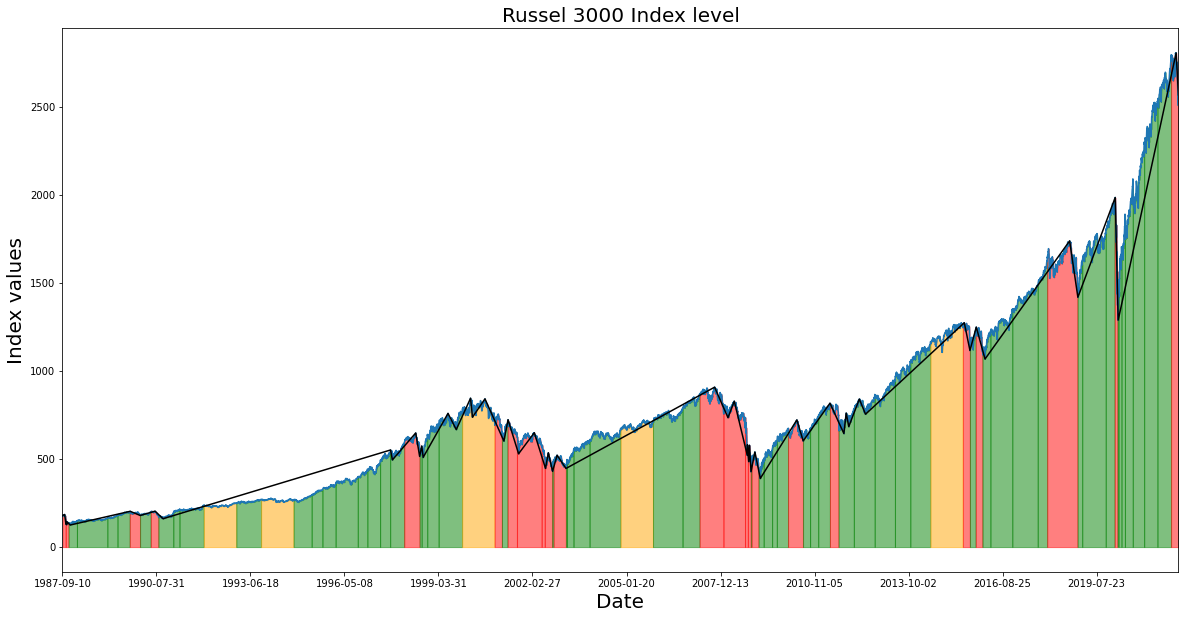

In [11]:
plt.figure(figsize=(20,10))
plt.plot(r_index.index,r_index['Adj Close'])
plt.plot(ts_pivots.index,ts_pivots.values,color='k')
#plt.plot(ts_pivots1.index,ts_pivots1.values,color='r')
plt.title('Russel 3000 Index level',fontsize=20)
plt.ylabel('Index values',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.xticks(np.arange(0, len(r_index.index)+1, 730))
# plt.xlim(4500,6000)
# plt.ylim(200,1000)

plt.margins(x=0)


for i, trend in enumerate(trends):
  dates_from_idx = r_index.index.values.tolist().index(dates[i])
  dates_to_idx = r_index.index.values.tolist().index(dates[i+1])
  if trend == 'BULL':
    plt.fill_between(r_index.index.values.tolist()[dates_from_idx:dates_to_idx],r_index['Adj Close'][dates_from_idx:dates_to_idx], color='g', alpha=0.5)
  elif trend=='BEAR':
    plt.fill_between(r_index.index.values.tolist()[dates_from_idx:dates_to_idx],r_index['Adj Close'][dates_from_idx:dates_to_idx], color='r', alpha=0.5)
  else:
    plt.fill_between(r_index.index.values.tolist()[dates_from_idx:dates_to_idx],r_index['Adj Close'][dates_from_idx:dates_to_idx], color='orange', alpha=0.5)

plt.show()

In [12]:
ts_pivots

Date
1987-09-10     178.830002
1987-10-05     184.800003
1987-10-19     131.039993
1987-10-21     145.330002
1987-10-26     127.379997
1987-11-02     142.250000
1987-12-04     125.260002
1989-10-09     203.100006
1990-01-30     179.419998
1990-07-16     203.850006
1990-10-11     161.100006
1997-10-07     551.250000
1997-10-27     494.910004
1998-07-17     647.539978
1998-08-31     514.669983
1998-09-23     573.530029
1998-10-08     509.100006
1999-07-16     758.940002
1999-10-15     667.030029
2000-03-24     844.780029
2000-04-14     737.150024
2000-09-01     841.469971
2001-04-04     601.739990
2001-05-21     722.849976
2001-09-21     529.659973
2002-03-19     649.090027
2002-07-23     446.700012
2002-08-22     535.200012
2002-10-09     430.160004
2002-11-27     521.400024
2003-03-11     446.359985
2007-10-09     907.580017
2008-03-10     734.719971
2008-05-19     828.179993
2008-10-10     520.969971
2008-10-13     580.750000
2008-10-27     485.250000
2008-11-04     577.619995
2008-11

In [13]:
ts_pivots_df=pd.DataFrame(ts_pivots)
ts_pivots_df.columns=['Index Levels']
ts_pivots_df

,Index Levels
Date,
1987-09-10,178.830002
1987-10-05,184.800003
1987-10-19,131.039993
1987-10-21,145.330002
1987-10-26,127.379997
1987-11-02,142.250000
1987-12-04,125.260002
1989-10-09,203.100006
1990-01-30,179.419998


In [14]:
ts_pivots_df['Change']=(ts_pivots_df['Index Levels'].pct_change(1)*100).fillna(0)
ts_pivots_df

,Index Levels,Change
Date,,
1987-09-10,178.830002,0.000000
1987-10-05,184.800003,3.338367
1987-10-19,131.039993,-29.090914
1987-10-21,145.330002,10.905075
1987-10-26,127.379997,-12.351204
1987-11-02,142.250000,11.673735
1987-12-04,125.260002,-11.943760
1989-10-09,203.100006,62.142745
1990-01-30,179.419998,-11.659285


In [15]:
old_state=-1
days = [0]
num_days=0
for i in pivots:
  num_days += 1
  if old_state==-1 and i==1:
    days.append(num_days)
    num_days=0
    old_state = 1
  elif old_state==1 and i==-1:
    days.append(num_days)
    num_days=0
    old_state = -1
days.append(num_days)

In [16]:
len(ts_pivots_df)

59

In [17]:
days

[0,
 18,
 10,
 2,
 3,
 5,
 23,
 466,
 78,
 115,
 62,
 1767,
 14,
 181,
 31,
 16,
 11,
 193,
 64,
 111,
 15,
 97,
 147,
 32,
 82,
 122,
 87,
 22,
 33,
 35,
 69,
 1154,
 104,
 49,
 101,
 1,
 10,
 6,
 12,
 30,
 42,
 284,
 49,
 208,
 108,
 18,
 20,
 82,
 48,
 767,
 44,
 49,
 68,
 657,
 64,
 290,
 23,
 450,
 18]

In [18]:
ts_pivots_df['Days']=np.array(days)
ts_pivots_df

,Index Levels,Change,Days
Date,,,
1987-09-10,178.830002,0.000000,0
1987-10-05,184.800003,3.338367,18
1987-10-19,131.039993,-29.090914,10
1987-10-21,145.330002,10.905075,2
1987-10-26,127.379997,-12.351204,3
1987-11-02,142.250000,11.673735,5
1987-12-04,125.260002,-11.943760,23
1989-10-09,203.100006,62.142745,466
1990-01-30,179.419998,-11.659285,78


In [19]:
ts_pivots_df['flag']=  [-1 if i <66 else 1 for i in list(ts_pivots_df['Days'].values) ]
ts_pivots_df

,Index Levels,Change,Days,flag
Date,,,,
1987-09-10,178.830002,0.000000,0,-1
1987-10-05,184.800003,3.338367,18,-1
1987-10-19,131.039993,-29.090914,10,-1
1987-10-21,145.330002,10.905075,2,-1
1987-10-26,127.379997,-12.351204,3,-1
1987-11-02,142.250000,11.673735,5,-1
1987-12-04,125.260002,-11.943760,23,-1
1989-10-09,203.100006,62.142745,466,1
1990-01-30,179.419998,-11.659285,78,1


# High Volatility neutral state

In [84]:
#high volatility neutral state
old_val=ts_pivots_df['Index Levels'][0]
new_val=0
trends = [0]
num_days = 0
num_entries = 0
check_flag = 0
trend_state=0
for i in range(1, len(ts_pivots_df)):

  if ts_pivots_df['flag'][i]==-1:
    if check_flag == 0: #to check if first -1
      old_val=ts_pivots_df['Index Levels'][i-1]
      check_flag=1
      num_entries=0
      num_days=0
    num_entries+=1
    new_val = ts_pivots_df['Index Levels'][i]
    num_days += ts_pivots_df['Days'][i]

  elif ts_pivots_df['flag'][i]==1 and check_flag==1:
    
    change_pct = (new_val-old_val )/old_val
    if change_pct <= -0.15:
      trend_state=-1
    elif change_pct >= 0.20:
      trend_state=1
    else:
      trend_state=0  
    for j in range(num_entries):
      trends.append(trend_state)
    check_flag=0
    trends.append(np.sign(ts_pivots_df['Change'][i]))
  else:
    trends.append(np.sign(ts_pivots_df['Change'][i]))
trends.append(np.sign(ts_pivots_df['Change'][i])) #last entry


In [85]:
ts_pivots_df['State'] = trends
ts_pivots_df

,Index Levels,Change,Days,flag,State
Date,,,,,
1987-09-10,178.830002,0.000000,0,-1,0.0
1987-10-05,184.800003,3.338367,18,-1,-1.0
1987-10-19,131.039993,-29.090914,10,-1,-1.0
1987-10-21,145.330002,10.905075,2,-1,-1.0
1987-10-26,127.379997,-12.351204,3,-1,-1.0
1987-11-02,142.250000,11.673735,5,-1,-1.0
1987-12-04,125.260002,-11.943760,23,-1,-1.0
1989-10-09,203.100006,62.142745,466,1,1.0
1990-01-30,179.419998,-11.659285,78,1,-1.0


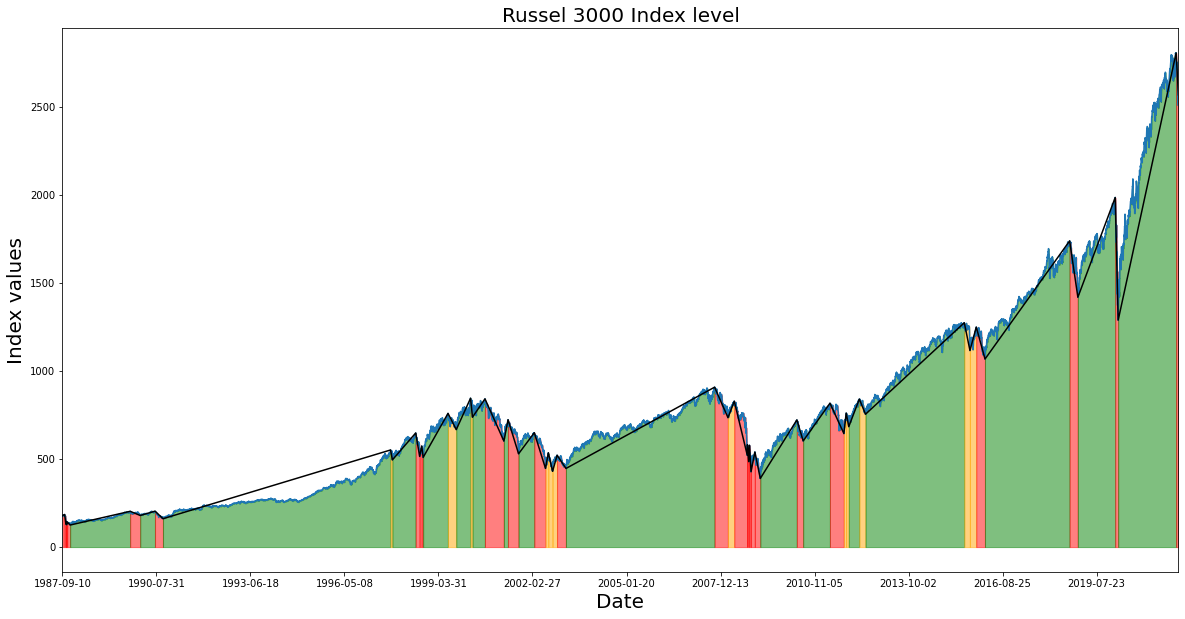

In [83]:
plt.figure(figsize=(20,10))
plt.plot(r_index.index,r_index['Adj Close'])
plt.plot(ts_pivots.index,ts_pivots.values,color='k')
#plt.plot(ts_pivots1.index,ts_pivots1.values,color='r')
plt.title('Russel 3000 Index level',fontsize=20)
plt.ylabel('Index values',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.xticks(np.arange(0, len(r_index.index)+1, 730))
plt.margins(x=0)

dates = list(ts_pivots_df.index)
all_dates = list(r_index.index.values)
for i in range(0, len(dates)-1):
  dates_from_idx = all_dates.index(dates[i])
  dates_to_idx = all_dates.index(dates[i+1])
  if ts_pivots_df['State'][i+1] == 0:
    plt.fill_between(r_index.index.values.tolist()[dates_from_idx:dates_to_idx],r_index['Adj Close'][dates_from_idx:dates_to_idx], color='orange', alpha=0.5)
  elif ts_pivots_df['State'][i+1] == 1:
    plt.fill_between(r_index.index.values.tolist()[dates_from_idx:dates_to_idx],r_index['Adj Close'][dates_from_idx:dates_to_idx], color='g', alpha=0.5)
  else:
    plt.fill_between(r_index.index.values.tolist()[dates_from_idx:dates_to_idx],r_index['Adj Close'][dates_from_idx:dates_to_idx], color='red', alpha=0.5)

plt.show()


Using the10% rule to indentify periods of high volatility for a 90 day period where the index levels do not move by more than 4% quarterly.

Period of high volatility neutral:
if the change between multiple phases <=90 then check with quarterly T bill rate

Period of low volatility neutral:
if the change between 1 phase is more than 250*2 days check for velocity (if less than 10% change in a period of 2 years) then low volatility neutral

# Low Volatility Neutral State

In [89]:
#Low vol markets on average will be bull markets (since we were classifying this as a continuous run of more than 500 days)
ts_pivots_df[ts_pivots_df['Days']>=252*2]
low_vol_df=ts_pivots_df[ts_pivots_df['Days']>=252*2]
low_vol_df['Change%']=(low_vol_df['Change']/100+1)**(252/low_vol_df['Days'])-1
low_vol_df

,Index Levels,Change,Days,flag,State,Change%
Date,,,,,,
1997-10-07,551.250000,242.178758,1767,1,1.0,0.191770
2007-10-09,907.580017,103.329162,1154,1,1.0,0.167621
2015-06-23,1273.390015,68.859986,767,1,1.0,0.187831
2018-09-20,1737.969971,62.831902,657,1,1.0,0.205633
